# EDA Rápido Antes de la Limpieza

#### 1. **Estructura y Dimensiones**
- Número de filas y columnas (`datos.shape`)
- Tipos de datos de cada columna (`datos.dtypes`)
- Primeras y últimas filas (`datos.head()`, `datos.tail()`)

#### 2. **Estadísticas Generales**
- Estadísticas descriptivas de variables numéricas (`datos.describe()`)
- Estadísticas de variables categóricas (`datos.describe(include='object')`)

#### 3. **Valores Nulos**
- Conteo de valores nulos por columna (`datos.isnull().sum()`)
- Porcentaje de nulos por columna

#### 4. **Duplicados**
- Número de filas duplicadas (`datos.duplicated().sum()`)

#### 5. **Valores Únicos**
- Número de valores únicos por columna (`datos.nunique()`)

#### 6. **Distribución de Variables**
- Histogramas y boxplots para variables numéricas
- Conteo de frecuencias para variables categóricas

#### 7. **Outliers**
- Detección visual con boxplots
- Revisión de valores extremos en estadísticas descriptivas

#### 8. **Relaciones entre Variables**
- Correlaciones entre variables numéricas (`datos.corr()`)
- Tablas cruzadas para variables categóricas

In [229]:
# Importar Librerías necesarias
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import plotly.express as px # Interactive data visualization

In [230]:
# Cargar el dataset
ruta_archivo = '../data/raw/amazon_sales_data 2025.csv'
datos = pd.read_csv(ruta_archivo)

#### 1. **Estructura y Dimensiones**
- Número de filas y columnas (`datos.shape`)
- Tipos de datos de cada columna (`datos.dtypes`)
- Primeras y últimas filas (`datos.head()`, `datos.tail()`)

In [231]:
# Números de filas y columnas
print(f"El dataset contiene {datos.shape[0]} filas y {datos.shape[1]} columnas.")

El dataset contiene 250 filas y 11 columnas.


In [232]:
# Tipos de datos de cada columna
print("Tipos de datos de cada columna:")
datos.dtypes

Tipos de datos de cada columna:


Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [233]:
# Primeras filas
datos.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [234]:
# Ultimas filas
datos.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


**Interpretación:**

* *Hay 250 filas y 11 columnas*
* *Hay un tipo de dato que debemos corregir, es el de `date` debe ser de tipo fecha*

In [235]:
# Cambio de tipo de dato de la columna 'Date' a datetime
datos['Date'] = pd.to_datetime(datos['Date'], format='%d-%m-%y')

#### 2. **Estadísticas Generales**
- Estadísticas descriptivas de variables numéricas (`datos.describe()`)
- Estadísticas de variables categóricas (`datos.describe(include='object')`)

In [236]:
# Estadísticas descriptivas de variables numéricas
datos.describe()

,Date,Price,Quantity,Total Sales
count,250,250.000000,250.000000,250.000000
mean,2025-03-04 02:29:45.600000,343.580000,2.856000,975.380000
min,2025-02-02 00:00:00,15.000000,1.000000,15.000000
25%,2025-02-18 00:00:00,40.000000,2.000000,100.000000
50%,2025-03-05 00:00:00,150.000000,3.000000,400.000000
75%,2025-03-18 00:00:00,600.000000,4.000000,1500.000000
max,2025-04-02 00:00:00,1200.000000,5.000000,6000.000000
std,NaN,380.635808,1.429489,1252.112254


In [237]:
# Estadísticas descriptivas de variables categóricass
datos.describe(include=['object'])

,Order ID,Product,Category,Customer Name,Customer Location,Payment Method,Status
count,250,250,250,250,250,250,250
unique,250,10,5,10,10,5,3
top,ORD0001,Smartphone,Electronics,Emma Clark,Houston,PayPal,Completed
freq,1,35,118,32,32,60,88


#### 3. **Valores Nulos**
- Conteo de valores nulos por columna (`datos.isnull().sum()`)
- Porcentaje de nulos por columna

In [238]:
# Conteo de valores nulos
print("Conteo de valores nulos por columna:")
datos.isnull().sum()

Conteo de valores nulos por columna:


Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [239]:
# Porcemtaje de valores nulos por columna
porcentaje_nulos = datos.isnull().mean() * 100
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos)

Porcentaje de valores nulos por columna:
Order ID             0.0
Date                 0.0
Product              0.0
Category             0.0
Price                0.0
Quantity             0.0
Total Sales          0.0
Customer Name        0.0
Customer Location    0.0
Payment Method       0.0
Status               0.0
dtype: float64


**Interpretación:**

* No hay ***nulos*** en el dataset

#### 4. **Duplicados**
- Número de filas duplicadas (`datos.duplicated().sum()`)

In [240]:
# Numero de duplicados
print("Número de filas duplicadas:")
print(datos.duplicated().sum())

Número de filas duplicadas:
0


**Interpretación:**

* No hay ***duplicados*** en el dataset

#### 5. **Valores Únicos**
- Número de valores únicos por columna (`datos.nunique()`)

In [241]:
# número de valores únicos por columna
print("Número de valores únicos por columna:")
datos.nunique()

Número de valores únicos por columna:


Order ID             250
Date                  60
Product               10
Category               5
Price                 10
Quantity               5
Total Sales           36
Customer Name         10
Customer Location     10
Payment Method         5
Status                 3
dtype: int64

#### 6. **Distribución de Variables**
- Histogramas y boxplots para variables numéricas
- Conteo de frecuencias para variables categóricas

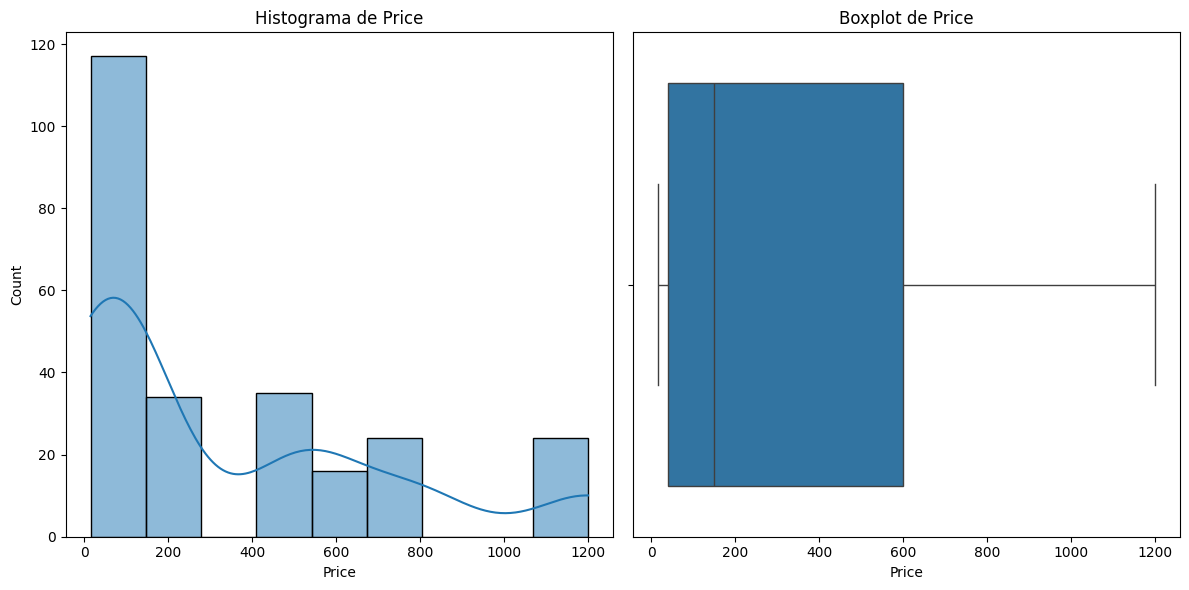

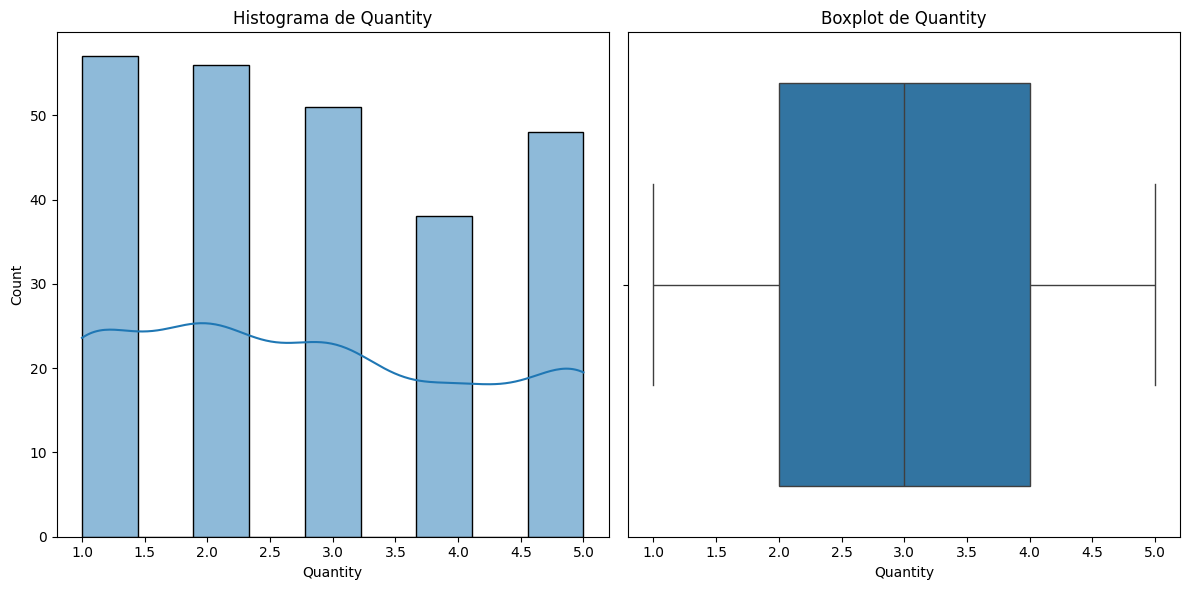

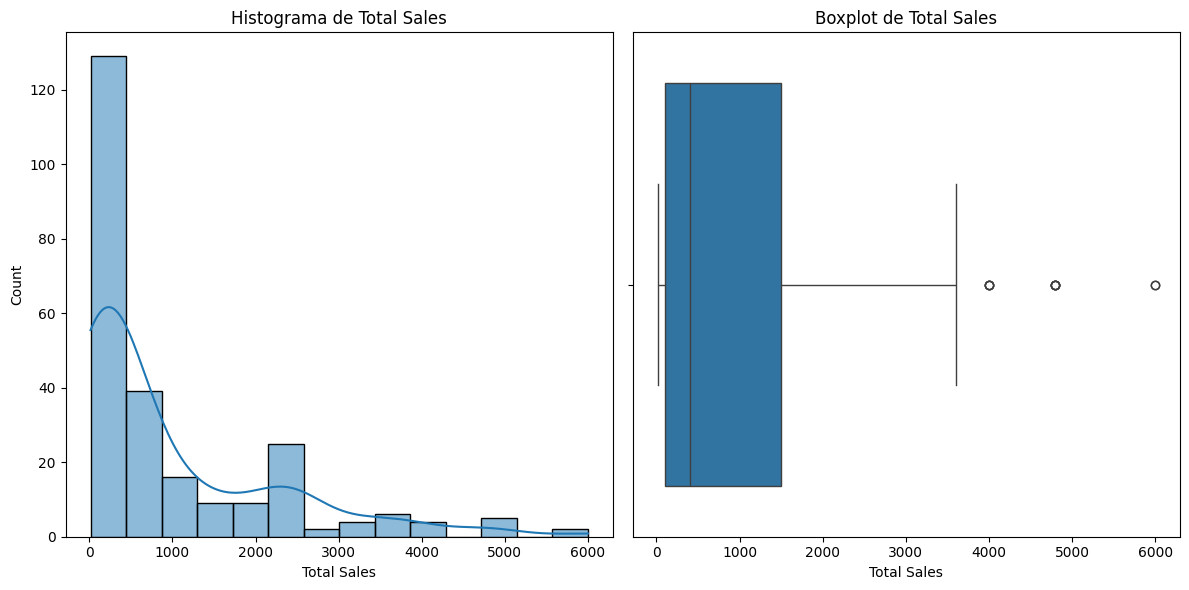

In [242]:
# Histogrmas y boxplots para variables numéricas
numericas = datos.select_dtypes(include=[np.number]).columns.tolist()
for col in numericas:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(datos[col], kde=True)
    plt.title(f'Histograma de {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=datos[col])
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

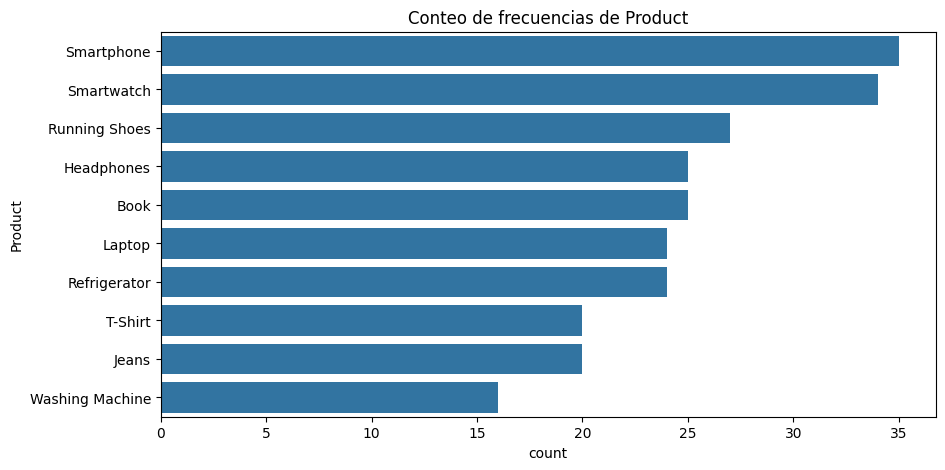

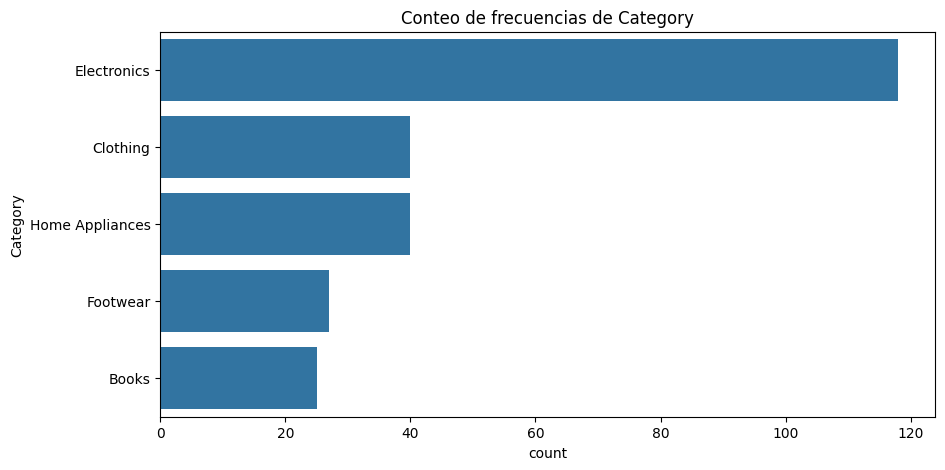

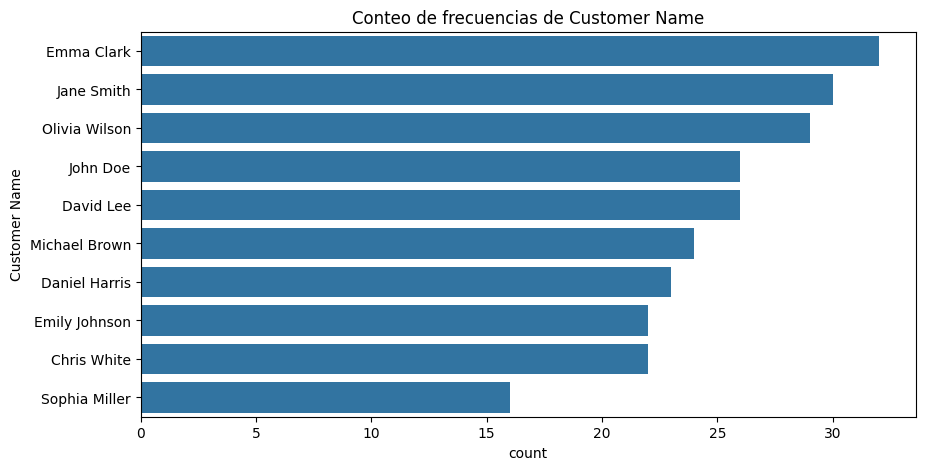

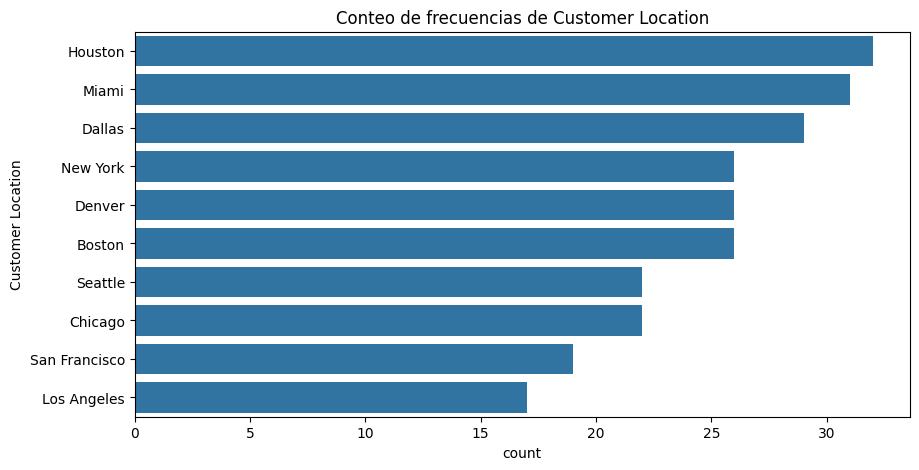

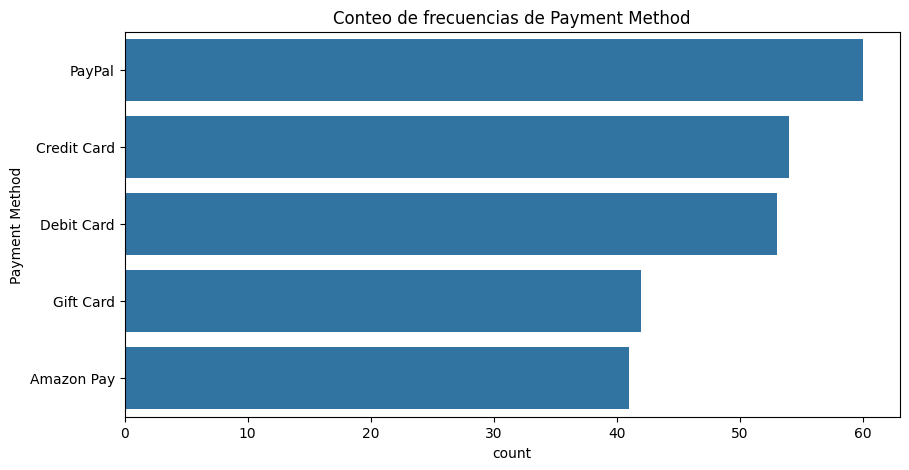

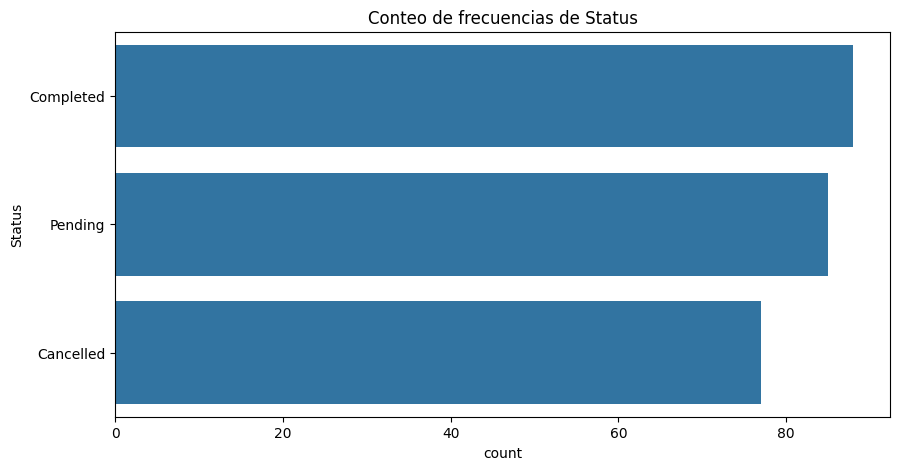

In [243]:
# Conteo de frecuencias para viariables categóricas excepto Order ID
categoriales = datos.select_dtypes(include=['object']).columns.tolist()
categoriales.remove('Order ID')  # Excluir 'Order ID'
for col in categoriales:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=datos[col], order=datos[col].value_counts().index)
    plt.title(f'Conteo de frecuencias de {col}')
    plt.show()

#### 7. **Outliers**
- Detección visual con boxplots
- Revisión de valores extremos en estadísticas descriptivas

In [244]:
# Detección visual de outliers con boxplots usando plotly
for col in numericas:
    fig = px.box(datos, y=col, title=f'Boxplot interactivo de {col}')
    fig.show()

In [245]:
# Detectar outliers usando el método IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
for col in numericas:
    outliers = detectar_outliers_iqr(datos, col)
    print(f"Outliers en {col}:")
    print(outliers[[col]])
    print("\n")
    

Outliers en Price:
Empty DataFrame
Columns: [Price]
Index: []


Outliers en Quantity:
Empty DataFrame
Columns: [Quantity]
Index: []


Outliers en Total Sales:
     Total Sales
21          4800
61          4000
63          4800
68          4800
73          4800
92          6000
119         4000
125         6000
154         4800
167         4000
230         4000




In [246]:
# Ver tabla con los ouliers hallados
outliers_tabla = pd.DataFrame()
for col in numericas:
    outliers = detectar_outliers_iqr(datos, col)
    outliers_tabla[col] = outliers[col]
outliers_tabla = outliers_tabla.dropna(how='all')  # Eliminar columnas sin outliers
print("Tabla de outliers detectados:")
outliers_tabla

Tabla de outliers detectados:


,Price,Quantity,Total Sales
21,NaN,NaN,4800
61,NaN,NaN,4000
63,NaN,NaN,4800
68,NaN,NaN,4800
73,NaN,NaN,4800
92,NaN,NaN,6000
119,NaN,NaN,4000
125,NaN,NaN,6000
154,NaN,NaN,4800
167,NaN,NaN,4000


#### 8. **Relaciones entre Variables**
- Correlaciones entre variables numéricas (`datos.corr()`)
- Tablas cruzadas para variables categóricas

Text(0.5, 1.0, 'Mapa de calor de correlaciones entre variables numéricas')

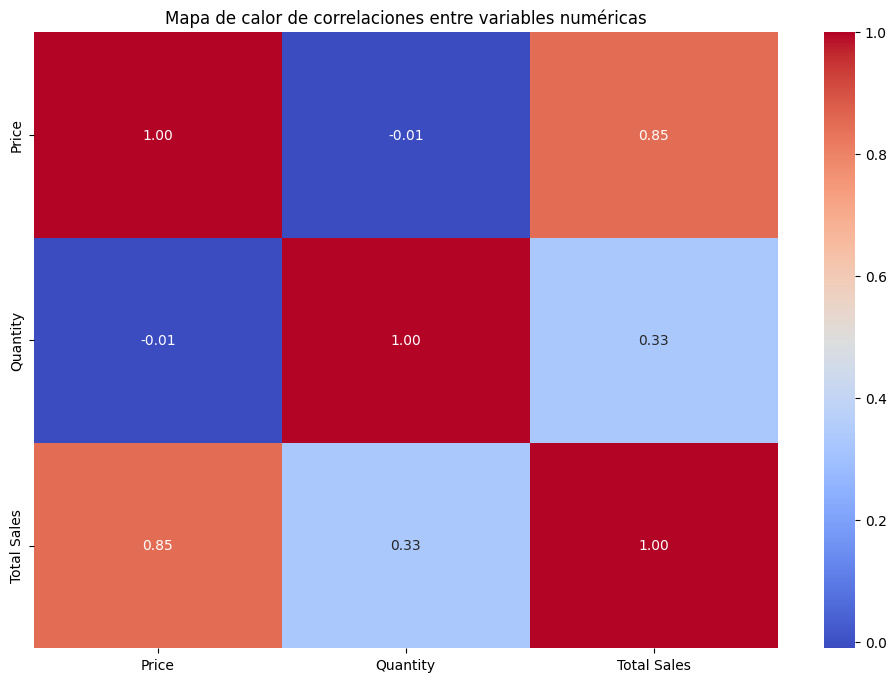

In [247]:
# Correlaciones entre variables numéricas
correlaciones = datos[numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones entre variables numéricas')


***

**El mapa de calor muestra:**

* **Price y Total Sales**: correlación fuerte positiva (**0.85**), lo que indica que a mayor precio, mayores ventas totales (posiblemente por un efecto de ticket promedio).
* **Quantity y Total Sales**: correlación positiva moderada (**0.33**), sugiere que más cantidad vendida sí incrementa ventas totales, pero no tanto como el precio.
* **Price y Quantity**: correlación prácticamente nula (**-0.01**), indicando independencia entre precio y cantidad vendida.

Esto significa que el precio influye más en las ventas totales que la cantidad.

***

**En palabras simples:**

* **Precio y ventas totales** (0.85): Cuando sube el precio, también suben las ventas totales.
* **Cantidad y ventas totales** (0.33): Vender más unidades ayuda, pero no tanto como subir el precio.
* **Precio y cantidad** (-0.01): El precio no afecta cuántas unidades se venden.

***

En el análisis, esto dice que:

* Para mover más las **ventas totales**, es más efectivo ajustar el **precio** que la cantidad vendida.
* La **cantidad** sí suma, pero su impacto es menor.
* **Precio y cantidad** son independientes, así que puedes optimizar cada uno por separado.


In [251]:
# Tablas cruzadas para variables categóricas

tabla_cruzada = pd.crosstab(index=datos['Product'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada
    

Tabla cruzada para Status:


col_0,count
Product,
Book,25
Headphones,25
Jeans,20
Laptop,24
Refrigerator,24
Running Shoes,27
Smartphone,35
Smartwatch,34
T-Shirt,20


In [252]:
tabla_cruzada = pd.crosstab(index=datos['Category'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada

Tabla cruzada para Status:


col_0,count
Category,
Books,25
Clothing,40
Electronics,118
Footwear,27
Home Appliances,40


In [253]:
tabla_cruzada = pd.crosstab(index=datos['Customer Name'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada

Tabla cruzada para Status:


col_0,count
Customer Name,
Chris White,22
Daniel Harris,23
David Lee,26
Emily Johnson,22
Emma Clark,32
Jane Smith,30
John Doe,26
Michael Brown,24
Olivia Wilson,29


In [254]:
tabla_cruzada = pd.crosstab(index=datos['Customer Location'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada

Tabla cruzada para Status:


col_0,count
Customer Location,
Boston,26
Chicago,22
Dallas,29
Denver,26
Houston,32
Los Angeles,17
Miami,31
New York,26
San Francisco,19


In [255]:
tabla_cruzada = pd.crosstab(index=datos['Payment Method'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada

Tabla cruzada para Status:


col_0,count
Payment Method,
Amazon Pay,41
Credit Card,54
Debit Card,53
Gift Card,42
PayPal,60


In [256]:
tabla_cruzada = pd.crosstab(index=datos['Status'], columns='count')
print(f"Tabla cruzada para {col}:")
tabla_cruzada

Tabla cruzada para Status:


col_0,count
Status,
Cancelled,77
Completed,88
Pending,85
